# Clean GSS Variables used in Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import thinkstats2
import thinkplot

import statsmodels.formula.api as smf

In [2]:
# Read in the GSS variables.
path = 'gss.hdf5'
gss = pd.read_hdf(path, key='gss')
gss.head()

,ballot,fund,other,denom,relig,cappun,libhomo,colhomo,spkhomo,natfare,...,natrace,nateduc,natdrug,natcity,natheal,natenvir,natspac,polviews,partyid,year
0,NaN,3.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1972
1,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1972
2,NaN,2.0,NaN,28.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1972
3,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1972
4,NaN,2.0,NaN,28.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1972


In [3]:
def make_plots(percentages, index, xlabel='Year', ylabel='Percent', titles=['Always Wrong', 'Never Wrong']):
    assert len(titles) == 2
    
    ax = plt.subplot(111)
    for column in percentages.columns[1:index]:
        ax.plot(percentages['year'], percentages[column], label=" ".join(column.split()[:-1]))

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(titles[0])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
        
    ax = plt.subplot(111)
    for column in percentages.columns[index:]:
        ax.plot(percentages['year'], percentages[column], label=" ".join(column.split()[:-1]))

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(titles[1])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

## Cohort-Period Analysis

### Sex

In [4]:
grouped_year = gss.groupby('year')

columns = ['year', 'male always', 'female always', 'male never', 'female never']

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    grouped_sex = group.groupby('sex')
    male_homosex = grouped_sex.get_group(1)['homosex'].dropna()
    female_homosex = grouped_sex.get_group(2)['homosex'].dropna()
    
    percent_male_always = (male_homosex == 1).mean() * 100
    percent_male_never = (male_homosex == 4).mean() * 100
    percent_female_always = (female_homosex == 1).mean() * 100
    percent_female_never = (female_homosex == 4).mean() * 100
    
    row = pd.DataFrame([[year, percent_male_always, percent_female_always, percent_male_never, percent_female_never]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

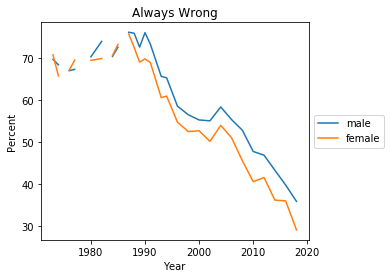

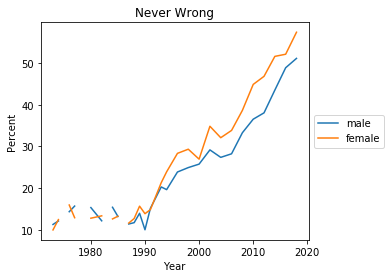

In [5]:
make_plots(percentages, 3)

Is there a dip in the 1980s?

### Income

In [6]:
grouped_year = gss.groupby('year')

columns = ['year',
           '<10 always',
           '10-30 always',
           '30-50 always',
           '50-70 always',
           '70-90 always',
           '>90 always',
           '<10 never',
           '10-30 never',
           '30-50 never',
           '50-70 never',
           '70-90 never',
           '>90 never']

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    inc1 = group[(group['realrinc'] < 10000)]
    percent_inc1_always = (inc1['homosex'].dropna() == 1).mean()
    percent_inc1_never = (inc1['homosex'].dropna() == 4).mean()
    
    inc2 = group[(group['realrinc'] >= 10000) & (group['realrinc'] < 30000)]
    percent_inc2_always = (inc2['homosex'].dropna() == 1).mean()
    percent_inc2_never = (inc2['homosex'].dropna() == 4).mean()
    
    inc3 = group[(group['realrinc'] >= 30000) & (group['realrinc'] < 50000)]
    percent_inc3_always = (inc3['homosex'].dropna() == 1).mean()
    percent_inc3_never = (inc3['homosex'].dropna() == 4).mean()
    
    inc4 = group[(group['realrinc'] >= 50000) & (group['realrinc'] < 70000)]
    percent_inc4_always = (inc4['homosex'].dropna() == 1).mean()
    percent_inc4_never = (inc4['homosex'].dropna() == 4).mean()
    
    inc5 = group[(group['realrinc'] >= 70000) & (group['realrinc'] < 90000)]
    percent_inc5_always = (inc5['homosex'].dropna() == 1).mean()
    percent_inc5_never = (inc5['homosex'].dropna() == 4).mean()
    
    inc6 = group[(group['realrinc'] >= 90000)]
    percent_inc6_always = (inc6['homosex'].dropna() == 1).mean()
    percent_inc6_never = (inc6['homosex'].dropna() == 4).mean()
    
    row = pd.DataFrame([[year,
                         percent_inc1_always,
                         percent_inc2_always,
                         percent_inc3_always,
                         percent_inc4_always,
                         percent_inc5_always,
                         percent_inc6_always,
                         percent_inc1_never,
                         percent_inc2_never,
                         percent_inc3_never,
                         percent_inc4_never,
                         percent_inc5_never,
                         percent_inc6_never]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

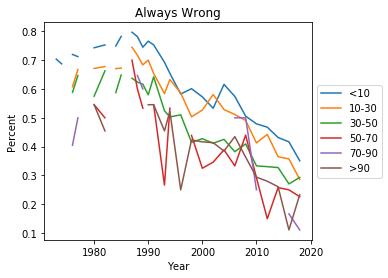

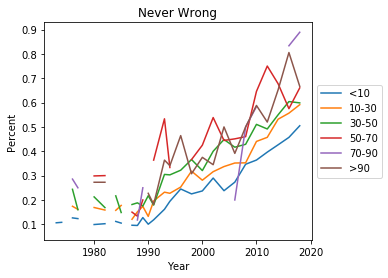

In [7]:
make_plots(percentages, 7)

### Political Affiliation

In [8]:
grouped_year = gss.groupby('year')

columns = ['year',
          'ext lib always',
          'lib always',
          'sl lib always',
          'mod always',
          'sl con always',
          'con always',
          'ext con always',
          'ext lib never',
          'lib never',
          'sl lib never',
          'mod never',
          'sl con never',
          'con never',
          'ext con never']

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    grouped_pol = group.groupby('polviews')
    keys = list(grouped_pol.groups.keys())
    if len(keys) == 7:
        ela = (grouped_pol.get_group(1)['homosex'].dropna() == 1).mean()
        la = (grouped_pol.get_group(2)['homosex'].dropna() == 1).mean()
        sla = (grouped_pol.get_group(3)['homosex'].dropna() == 1).mean()
        ma = (grouped_pol.get_group(4)['homosex'].dropna() == 1).mean()
        sca = (grouped_pol.get_group(5)['homosex'].dropna() == 1).mean()
        ca = (grouped_pol.get_group(6)['homosex'].dropna() == 1).mean()
        eca = (grouped_pol.get_group(7)['homosex'].dropna() == 1).mean()
        
        eln = (grouped_pol.get_group(1)['homosex'].dropna() == 4).mean()
        ln = (grouped_pol.get_group(2)['homosex'].dropna() == 4).mean()
        sln = (grouped_pol.get_group(3)['homosex'].dropna() == 4).mean()
        mn = (grouped_pol.get_group(4)['homosex'].dropna() == 4).mean()
        scn = (grouped_pol.get_group(5)['homosex'].dropna() == 4).mean()
        cn = (grouped_pol.get_group(6)['homosex'].dropna() == 4).mean()
        ecn = (grouped_pol.get_group(7)['homosex'].dropna() == 4).mean()
        row = pd.DataFrame([[year, ela, la, sla, ma, sca, ca, eca, eln, ln, sln, mn, scn, cn, ecn]], columns=columns)

        percentages = percentages.append(row, ignore_index=True)

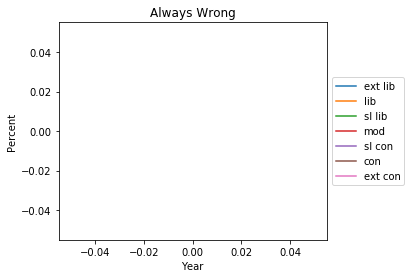

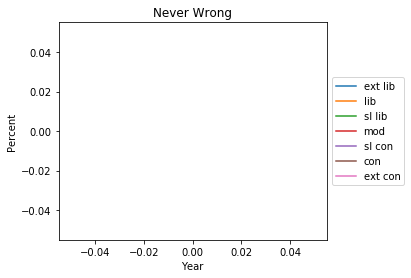

In [9]:
make_plots(percentages, 8)

### Religion

In [10]:
grouped_year = gss.groupby('year')
rel = gss.groupby('relig')

# Only the first 5 categories have consistent numbers of respondants.
columns = ['year',
          'protestant always',
          'catholic always',
          'jewish always',
          'none always',
          'other always',
          'protestant never',
          'catholic never',
          'jewish never',
          'none never',
          'other never'
          ]

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    grouped_relig = group.groupby('relig')
    keys = list(grouped_relig.groups.keys())
    
    pa = (grouped_relig.get_group(1)['homosex'].dropna() == 1).mean()
    ca = (grouped_relig.get_group(2)['homosex'].dropna() == 1).mean()
    ja = (grouped_relig.get_group(3)['homosex'].dropna() == 1).mean()
    na = (grouped_relig.get_group(4)['homosex'].dropna() == 1).mean()
    oa = (grouped_relig.get_group(5)['homosex'].dropna() == 1).mean()
    
    pn = (grouped_relig.get_group(1)['homosex'].dropna() == 4).mean()
    cn = (grouped_relig.get_group(2)['homosex'].dropna() == 4).mean()
    jn = (grouped_relig.get_group(3)['homosex'].dropna() == 4).mean()
    nn = (grouped_relig.get_group(4)['homosex'].dropna() == 4).mean()
    on = (grouped_relig.get_group(5)['homosex'].dropna() == 4).mean()
    
    row = pd.DataFrame([[year, pa, ca, ja, na, oa, pn, cn, jn, nn, on]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

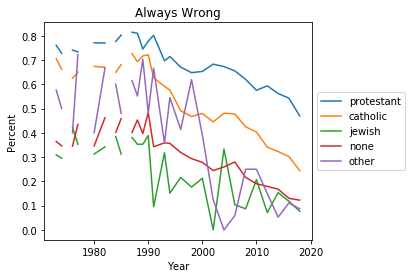

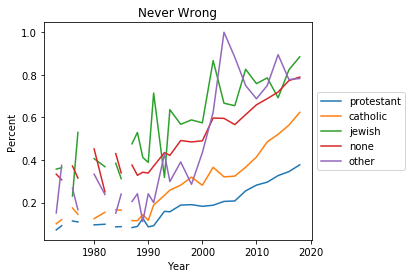

In [11]:
make_plots(percentages, 6)

### Fundamentalism

In [12]:
grouped_year = gss.groupby('year')

columns = ['year',
          'fundamentalist always',
          'moderate always',
          'liberal always',
          'fundamentalist never',
          'moderate never',
          'liberal never']

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    grouped_fund = group.groupby('fund')
    
    fa = (grouped_fund.get_group(1)['homosex'].dropna() == 1).mean()
    ma = (grouped_fund.get_group(2)['homosex'].dropna() == 1).mean()
    la = (grouped_fund.get_group(3)['homosex'].dropna() == 1).mean()
    
    fn = (grouped_fund.get_group(1)['homosex'].dropna() == 4).mean()
    mn = (grouped_fund.get_group(2)['homosex'].dropna() == 4).mean()
    ln = (grouped_fund.get_group(3)['homosex'].dropna() == 4).mean()
    
    row = pd.DataFrame([[year, fa, ma, la, fn, mn, ln]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

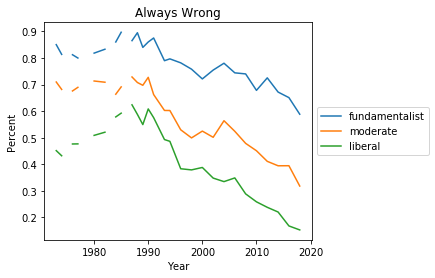

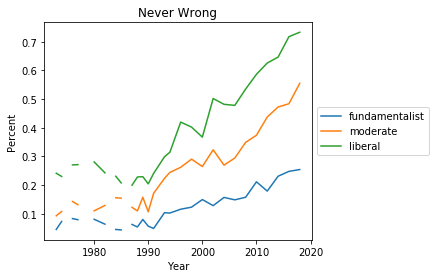

In [13]:
make_plots(percentages, 4)

### Marital Status

In [14]:
grouped_year = gss.groupby('year')

columns = ['year', 
           'married always', 
           'widowed always', 
           'divorced always', 
           'separated always', 
           'never married always',
           'married never', 
           'widowed never', 
           'divorced never', 
           'separated never', 
           'never married never']

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    grouped_mar = group.groupby('marital')
    
    married_homosex = grouped_mar.get_group(1)['homosex'].dropna()
    widowed_homosex = grouped_mar.get_group(2)['homosex'].dropna()
    divorced_homosex = grouped_mar.get_group(3)['homosex'].dropna()
    separated_homosex = grouped_mar.get_group(4)['homosex'].dropna()
    nev_married_homosex = grouped_mar.get_group(5)['homosex'].dropna()

    ma = (married_homosex == 1).mean()
    wa = (widowed_homosex == 1).mean()
    da = (divorced_homosex == 1).mean()
    sa = (separated_homosex == 1).mean()
    na = (nev_married_homosex == 1).mean()
    
    mn = (married_homosex == 4).mean()
    wn = (widowed_homosex == 4).mean()
    dn = (divorced_homosex == 4).mean()
    sn = (separated_homosex == 4).mean()
    nn = (nev_married_homosex == 4).mean()
    
    row = pd.DataFrame([[year, ma, wa, da, sa, na, mn, wn, dn, sn, nn]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

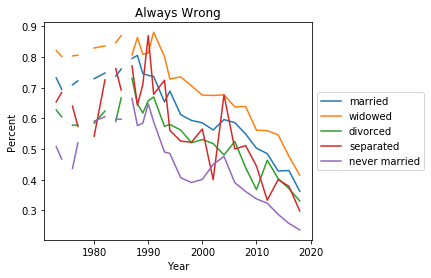

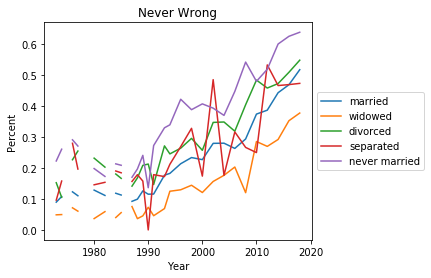

In [15]:
make_plots(percentages, 6)

### Age

In [16]:
grouped_year = gss.groupby('year')

columns = ['year',
           '20s always',
           '30s always',
           '40s always',
           '50s always',
           '60s always',
           '70s always',
           '80s always',
           '20s never',
           '30s never',
           '40s never',
           '50s never',
           '60s never',
           '70s never',
           '80s never']

percentages = pd.DataFrame([], columns=columns)


for year, group in grouped_year:
    
    twenty = group[(group['age'] < 30)]
    thirty = group[(group['age'] >= 30) & (group['age'] < 40)]
    fourty = group[(group['age'] >= 40) & (group['age'] < 50)]
    fifty = group[(group['age'] >= 50) & (group['age'] < 60)]
    sixty = group[(group['age'] >= 60) & (group['age'] < 70)]
    seventy = group[(group['age'] >= 70) & (group['age'] < 80)]
    eighty = group[(group['age'] >= 80) & (group['age'] <= 89)]
    
    a20 = (twenty['homosex'].dropna() == 1).mean()
    a30 = (thirty['homosex'].dropna() == 1).mean()
    a40 = (fourty['homosex'].dropna() == 1).mean()
    a50 = (fifty['homosex'].dropna() == 1).mean()
    a60 = (sixty['homosex'].dropna() == 1).mean()
    a70 = (seventy['homosex'].dropna() == 1).mean()
    a80 = (eighty['homosex'].dropna() == 1).mean()
    
    n20 = (twenty['homosex'].dropna() == 4).mean()
    n30 = (thirty['homosex'].dropna() == 4).mean()
    n40 = (fourty['homosex'].dropna() == 4).mean()
    n50 = (fifty['homosex'].dropna() == 4).mean()
    n60 = (sixty['homosex'].dropna() == 4).mean()
    n70 = (seventy['homosex'].dropna() == 4).mean()
    n80 = (eighty['homosex'].dropna() == 4).mean()
    
    row = pd.DataFrame([[year,
                         a20, a30, a40, a50, a60, a70, a80, n20, n30, n40, n50, n60, n70, n80]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

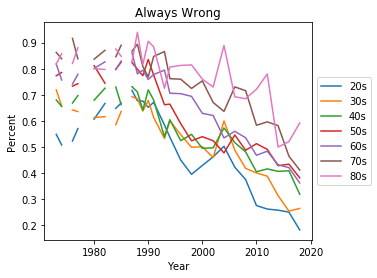

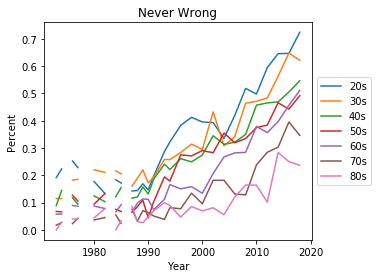

In [17]:
make_plots(percentages, 8)

### Period - Survey Year Completion

In [18]:
grouped_age = gss.groupby('age')

columns = ['year',
           '1972-1979 always',
           '1980-1987 always',
           '1988-1995 always',
           '1996-2003 always',
           '2004-2011 always',
           '2012-2018 always',
           '1972-1979 never',
           '1980-1987 never',
           '1988-1995 never',
           '1996-2003 never',
           '2004-2011 never',
           '2012-2018 never']

percentages = pd.DataFrame([], columns=columns)


for age, group in grouped_age:
    
    year1 = group[(group['year'] < 1980)]
    year3 = group[(group['year'] >= 1980) & (group['year'] < 1988)]
    year5 = group[(group['year'] >= 1988) & (group['year'] < 1996)]
    year7 = group[(group['year'] >= 1996) & (group['year'] < 2004)]
    year9 = group[(group['year'] >= 2004) & (group['year'] < 2012)]
    year11 = group[(group['year'] >= 2012) & (group['year'] <= 2018)]
    
    a1 = (year1['homosex'].dropna() == 1).mean()
    a3 = (year3['homosex'].dropna() == 1).mean()
    a5 = (year5['homosex'].dropna() == 1).mean()
    a7 = (year7['homosex'].dropna() == 1).mean()
    a9 = (year9['homosex'].dropna() == 1).mean()
    a11 = (year11['homosex'].dropna() == 1).mean()
    
    n1 = (year1['homosex'].dropna() == 4).mean()
    n3 = (year3['homosex'].dropna() == 4).mean()
    n5 = (year5['homosex'].dropna() == 4).mean()
    n7 = (year7['homosex'].dropna() == 4).mean()
    n9 = (year9['homosex'].dropna() == 4).mean()
    n11 = (year11['homosex'].dropna() == 4).mean()
    
    row = pd.DataFrame([[age,
                         a1, a3, a5, a7,a9, a11, n1, n3, n5, n7, n9, n11]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

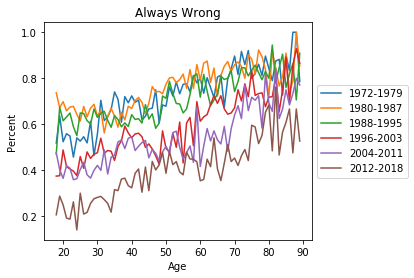

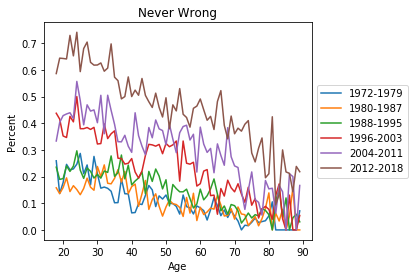

In [19]:
make_plots(percentages, 7, xlabel="Age")

### Cohort

In [20]:
grouped_age = gss.groupby('age')

columns = ['year',
           '1930s always',
           '1940s always',
           '1950s always',
           '1960s always',
           '1970s always',
           '1980s always',
           '1990s always',
           '1930s never',
           '1940s never',
           '1950s never',
           '1960s never',
           '1970s never',
           '1980s never',
           '1990s never']

percentages = pd.DataFrame([], columns=columns)


for age, group in grouped_age:
    
    cohort1 = group[(group['cohort'] >= 1930) &(group['cohort'] < 1940)]
    cohort2 = group[(group['cohort'] >= 1940) & (group['cohort'] < 1950)]
    cohort3 = group[(group['cohort'] >= 1950) & (group['cohort'] < 1960)]
    cohort4 = group[(group['cohort'] >= 1960) & (group['cohort'] < 1970)]
    cohort5 = group[(group['cohort'] >= 1970) & (group['cohort'] < 1980)]
    cohort6 = group[(group['cohort'] >= 1980) & (group['cohort'] < 1990)]
    cohort7 = group[(group['cohort'] >= 1990) & (group['cohort'] < 2000)]
    
    a1 = (cohort1['homosex'].dropna() == 1).mean()
    a2 = (cohort2['homosex'].dropna() == 1).mean()
    a3 = (cohort3['homosex'].dropna() == 1).mean()
    a4 = (cohort4['homosex'].dropna() == 1).mean()
    a5 = (cohort5['homosex'].dropna() == 1).mean()
    a6 = (cohort6['homosex'].dropna() == 1).mean()
    a7 = (cohort7['homosex'].dropna() == 1).mean()
    
    n1 = (cohort1['homosex'].dropna() == 4).mean()
    n2 = (cohort2['homosex'].dropna() == 4).mean()
    n3 = (cohort3['homosex'].dropna() == 4).mean()
    n4 = (cohort4['homosex'].dropna() == 4).mean()
    n5 = (cohort5['homosex'].dropna() == 4).mean()
    n6 = (cohort6['homosex'].dropna() == 4).mean()
    n7 = (cohort7['homosex'].dropna() == 4).mean()
    
    row = pd.DataFrame([[age, a1, a2, a3, a4, a5, a6, a7, n1, n2, n3, n4, n5, n6, n7]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

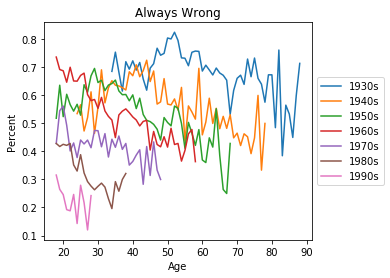

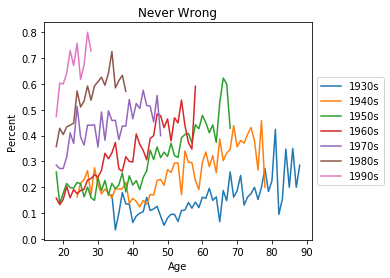

In [21]:
make_plots(percentages, 8, xlabel="Age")

In [22]:
grouped_cohort = gss.groupby('cohort')

columns = ['year',
           '20s always',
           '30s always',
           '40s always',
           '50s always',
           '60s always',
           '70s always',
           '80s always',
           '20s never',
           '30s never',
           '40s never',
           '50s never',
           '60s never',
           '70s never',
           '80s never']

percentages = pd.DataFrame([], columns=columns)


for cohort, group in grouped_cohort:
    
    twenty = group[(group['age'] < 30)]
    thirty = group[(group['age'] >= 30) & (group['age'] < 40)]
    fourty = group[(group['age'] >= 40) & (group['age'] < 50)]
    fifty = group[(group['age'] >= 50) & (group['age'] < 60)]
    sixty = group[(group['age'] >= 60) & (group['age'] < 70)]
    seventy = group[(group['age'] >= 70) & (group['age'] < 80)]
    eighty = group[(group['age'] >= 80) & (group['age'] <= 89)]
    
    a20 = (twenty['homosex'].dropna() == 1).mean()
    a30 = (thirty['homosex'].dropna() == 1).mean()
    a40 = (fourty['homosex'].dropna() == 1).mean()
    a50 = (fifty['homosex'].dropna() == 1).mean()
    a60 = (sixty['homosex'].dropna() == 1).mean()
    a70 = (seventy['homosex'].dropna() == 1).mean()
    a80 = (eighty['homosex'].dropna() == 1).mean()
    
    n20 = (twenty['homosex'].dropna() == 4).mean()
    n30 = (thirty['homosex'].dropna() == 4).mean()
    n40 = (fourty['homosex'].dropna() == 4).mean()
    n50 = (fifty['homosex'].dropna() == 4).mean()
    n60 = (sixty['homosex'].dropna() == 4).mean()
    n70 = (seventy['homosex'].dropna() == 4).mean()
    n80 = (eighty['homosex'].dropna() == 4).mean()
    
    row = pd.DataFrame([[cohort,
                         a20, a30, a40, a50, a60, a70, a80, n20, n30, n40, n50, n60, n70, n80]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

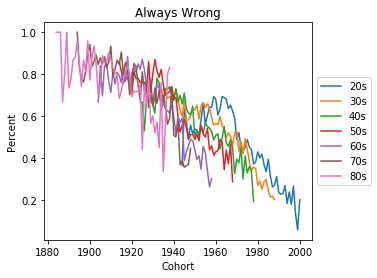

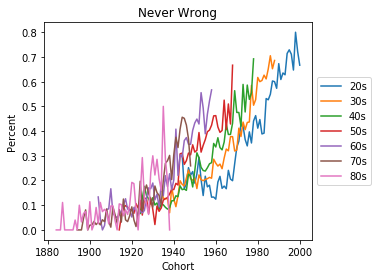

In [23]:
make_plots(percentages, 8, xlabel="Cohort")

### 16 Year Old Residence

In [24]:
grouped_year = gss.groupby('year')

columns = ['year',
           'country, nonfarm always',
           'farm always',
           'town <50000 always',
           '50000-250000 always',
           'big-city suburb always',
           'city >250000 always',
           'country, nonfarm never',
           'farm never',
           'town <50000 never',
           '50000-250000 never',
           'big-city suburb never',
           'city >250000 never']

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    
    grouped_res16 = group.groupby('res16')
    
    country = grouped_res16.get_group(1)['homosex'].dropna()
    farm = grouped_res16.get_group(2)['homosex'].dropna()
    town = grouped_res16.get_group(3)['homosex'].dropna()
    mid = grouped_res16.get_group(4)['homosex'].dropna()
    suburb = grouped_res16.get_group(5)['homosex'].dropna()
    city = grouped_res16.get_group(6)['homosex'].dropna()
           
    cna = (country.dropna() == 1).mean()
    fa = (farm.dropna() == 1).mean()
    ta = (town.dropna() == 1).mean()
    ma = (mid.dropna() == 1).mean()
    sa = (suburb.dropna() == 1).mean()
    ca = (city.dropna() == 1).mean()
    
    cnn = (country.dropna() == 4).mean()
    fn = (farm.dropna() == 4).mean()
    tn = (town.dropna() == 4).mean()
    mn = (mid.dropna() == 4).mean()
    sn = (suburb.dropna() == 4).mean()
    cn = (city.dropna() == 4).mean()
           
    row = pd.DataFrame([[year, cna, fa, ta, ma, sa, ca, cnn, fn, tn, mn, sn, cn]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

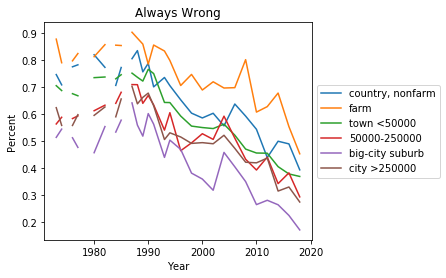

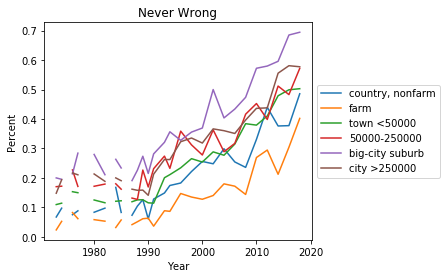

In [25]:
make_plots(percentages, 7)

### Region of Residence at 16

In [26]:
grouped_year = gss.groupby('year')

columns = ['year',
           'foreign always',
           'new england always',
           'mid atlantic always',
           'EN central always',
           'WN central always',
           'S atlantic always',
           'ES central always',
           'WS central always',
           'mountain always',
           'pacific always',
           'foreign never',
           'new england never',
           'mid atlantic never',
           'EN central never',
           'WN central never',
           'S atlantic never',
           'ES central never',
           'WS central never',
           'mountain never',
           'pacific never']

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    
    grouped_reg16 = group.groupby('reg16')
    
    foreign = grouped_reg16.get_group(0)['homosex'].dropna()
    ne = grouped_reg16.get_group(1)['homosex'].dropna()
    ma = grouped_reg16.get_group(2)['homosex']
    enc = grouped_reg16.get_group(3)['homosex'].dropna()
    wnc = grouped_reg16.get_group(4)['homosex'].dropna()
    sa = grouped_reg16.get_group(5)['homosex'].dropna()
    esc = grouped_reg16.get_group(6)['homosex'].dropna()
    wsc = grouped_reg16.get_group(7)['homosex'].dropna()
    mount = grouped_reg16.get_group(8)['homosex'].dropna()
    pac = grouped_reg16.get_group(9)['homosex'].dropna()
           
    fa = (foreign.dropna() == 1).mean()
    nea = (ne.dropna() == 1).mean()
    maa = (ma.dropna() == 1).mean()
    enca = (enc.dropna() == 1).mean()
    
    wnca = (wnc.dropna() == 1).mean()
    saa = (sa.dropna() == 1).mean()
    esca = (esc.dropna() == 1).mean()
    wsca = (wsc.dropna() == 1).mean()
    mal = (mount.dropna() == 1).mean()
    pa = (pac.dropna() == 1).mean()
    
    fn = (foreign.dropna() == 4).mean()
    nen = (ne.dropna() == 4).mean()
    man = (ma.dropna() == 4).mean()
    encn = (enc.dropna() == 4).mean()
    wncn = (wnc.dropna() == 4).mean()
    san = (sa.dropna() == 4).mean()
    escn = (esc.dropna() == 4).mean()
    wscn = (wsc.dropna() == 4).mean()
    mn = (mount.dropna() == 4).mean()
    pn = (pac.dropna() == 4).mean()
           
    row = pd.DataFrame([[year, fa, nea, maa, enca, wnca, saa, esca, wsca, mal, pa, fn, nen, man, encn, wncn, san, escn, wscn, mn, pn]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

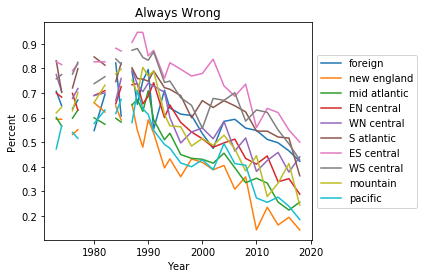

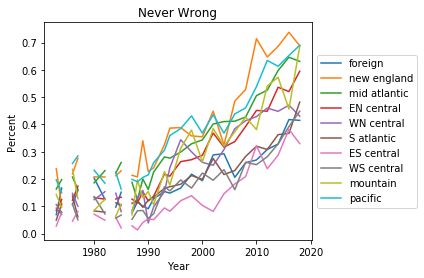

In [27]:
make_plots(percentages, 11)

In [28]:
log_model = gss

# Change 'Never Wrong' code to 0 for logistic regression.
log_model['homosex'].replace(4, 0, inplace=True)
log_model['homosex'].value_counts()

1.0    23469
0.0     9880
3.0     2554
2.0     1756
8.0     1743
5.0       82
Name: homosex, dtype: int64

In [47]:
log_model['homosex'].replace([2, 3, 5, 8], np.nan, inplace=True)
log_model['homosex'].value_counts()

1.0    23469
0.0     9880
Name: homosex, dtype: int64

In [48]:
# results_sex = smf.logit('homosex ~ year + age +C(sex) + C(fund) + C(region)', data=log_model).fit()
results_sex = smf.logit('homosex ~ year + cohort + C(sex) + C(reg16) + C(relig) + C(attend)', data=log_model).fit()

Optimization terminated successfully.
         Current function value: 0.462359
         Iterations 7


In [49]:
results_sex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                homosex   No. Observations:                33034
Model:                          Logit   Df Residuals:                    33000
Method:                           MLE   Df Model:                           33
Date:                Fri, 05 Apr 2019   Pseudo R-squ.:                  0.2395
Time:                        15:03:28   Log-Likelihood:                -15274.
converged:                       True   LL-Null:                       -20084.
                                        LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          112.7919      2.276     49.547      0.000     108.330     117.254
C(sex)[T.2]         -0.4881      0.029    -16.694      0.000      -0.545      -0.431
C(reg16)[T.1]       -1.2104      0.085    -14.299      0.000      -1.376      -1.044
C(reg16)[T.2]       -0.9532      0.068    -13.974      0.000      -1.087      -0.820
C(reg16)[T.3]       -0.6652      0.067     -9.921      0.000      -0.797      -0.534
C(reg16)[T.4]       -0.6325      0.078     -8.132      0.000      -0.785      -0.480
C(reg16)[T.5]       -0.3211      0.071     -4.532      0.000      -0.460      -0.182
C(reg16)[T.6]        0.1951      0.088      2.209      0.027       0.022       0.368
C(reg16)[T.7]       -0.1419      0.079     -1.801      0.072      -0.296       0.013
C(reg16)[T.8]       -0.6095      0.087     -7.038      0.000      -0.779      -0.440
C(reg16)[T.9]       -1.0140      0.072    -13.999      0.000      -1.156      -0.872
C(relig)[T.2.0]     -0.5982      0.035    -16.904      0.000      -0.668      -0.529
C(relig)[T.3.0]     -1.9718      0.101    -19.484      0.000      -2.170      -1.773
C(relig)[T.4.0]     -1.4100      0.047    -29.758      0.000      -1.503      -1.317
C(relig)[T.5.0]     -1.2782      0.100    -12.783      0.000      -1.474      -1.082
C(relig)[T.6.0]     -2.1860      0.291     -7.512      0.000      -2.756      -1.616
C(relig)[T.7.0]     -1.3687      0.313     -4.377      0.000      -1.982      -0.756
C(relig)[T.8.0]     -0.8443      0.516     -1.635      0.102      -1.856       0.168
C(relig)[T.9.0]      0.2959      0.296      1.001      0.317      -0.284       0.875
C(relig)[T.10.0]    -0.7278      0.300     -2.425      0.015      -1.316      -0.140
C(relig)[T.11.0]    -0.1277      0.117     -1.091      0.275      -0.357       0.102
C(relig)[T.12.0]    -0.8538      0.635     -1.346      0.178      -2.098       0.390
C(relig)[T.13.0]    -0.3866      0.294     -1.315      0.189      -0.963       0.190
C(relig)[T.98.0]    -0.6101      0.509     -1.199      0.230      -1.607       0.387
C(attend)[T.1.0]    -0.0796      0.057     -1.391      0.164      -0.192       0.033
C(attend)[T.2.0]    -0.0695      0.048     -1.435      0.151      -0.164       0.025
C(attend)[T.3.0]     0.2019      0.052      3.918      0.000       0.101       0.303
C(attend)[T.4.0]     0.2595      0.062      4.198      0.000       0.138       0.381
C(attend)[T.5.0]     0.4866      0.059      8.223      0.000       0.371       0.603
C(attend)[T.6.0]     1.0450      0.077     13.538      0.000       0.894       1.196
C(attend)[T.7.0]     1.2967      0.052     25.168      0.000       1.196       1.398
C(attend)[T.8.0]     2.4407      0.097     25.124      0.000       2.250       2.631
year                -0.0557      0.001    -48.997      0.000      -0.058      -0.053
cohort             4.04e-06   3.47e-05      0.117      0.907   -6.39e-05     7.2e-05
====================================================================================
"""

In [50]:
grouped_year = log_model.groupby('year')
disapprove_homosex = grouped_year['homosex'].mean()

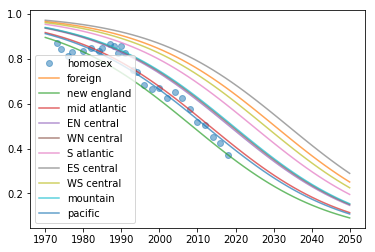

In [51]:
def make_region_df(region_code):
    df = pd.DataFrame()
    df['year'] = np.linspace(1970, 2050)
    df['cohort'] = 1977
    df['sex'] = 1
    df['fund'] = 3
    df['reg16'] = region_code
    df['relig'] = 1
    df['attend'] = 3
    
    return df

plt.plot(disapprove_homosex, 'o', alpha=0.5)

regions = ['foreign',
        'new england',
           'mid atlantic',
           'EN central',
           'WN central',
           'S atlantic',
           'ES central',
           'WS central',
           'mountain',
           'pacific']

for code, region in enumerate(regions):
    df = make_region_df(code)
    pred = results_sex.predict(df)
    plt.plot(df['year'], pred, label=region, alpha=0.7)
    
plt.legend()

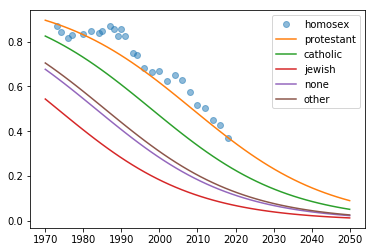

In [52]:
def make_relig_df(relig):
    df = pd.DataFrame()
    df['year'] = np.linspace(1970, 2050)
    df['cohort'] = 1997
    df['sex'] = 1
    df['fund'] = 2
    df['reg16'] = 1
    df['relig'] = relig
    df['attend'] = 3
    
    return df

plt.plot(disapprove_homosex, 'o', alpha=0.5)

religions = ['protestant', 'catholic', 'jewish', 'none', 'other']
for code, relig in enumerate(religions):
    df = make_relig_df(code + 1)
    pred = results_sex.predict(df)
    plt.plot(df['year'], pred, label=relig)
    
plt.legend()

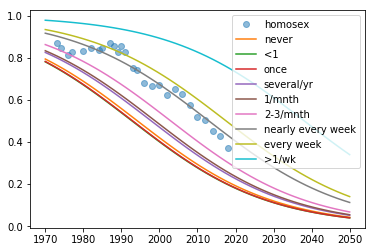

In [53]:
def make_attend_df(attend):
    df = pd.DataFrame()
    df['year'] = np.linspace(1970, 2050)
    df['cohort'] = 1997
    df['sex'] = 1
    df['fund'] = 2
    df['reg16'] = 1
    df['relig'] = 2
    df['attend'] = attend
    
    return df

plt.plot(disapprove_homosex, 'o', alpha=0.5)

religions = ['never', '<1', 'once', 'several/yr', '1/mnth', '2-3/mnth', 'nearly every week', 'every week', '>1/wk']
for code, att in enumerate(religions):
    df = make_attend_df(code)
    pred = results_sex.predict(df)
    plt.plot(df['year'], pred, label=att)
    
plt.legend()